In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_rows",210)
pd.set_option("display.max_columns",27)

np.random.seed(seed=5)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,100,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,100,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,100,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null int64
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nul

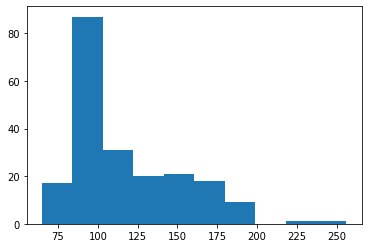

In [5]:
plt.hist(x=df['normalized-losses'])
plt.show()

### Drop all categorical features

In [6]:
df = df.drop(['symboling','make','fuel-type','aspiration','num-of-doors','body-style',
              'drive-wheels','engine-location','engine-type','fuel-system'], axis=1)

In [7]:
df.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,100,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,100,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,100,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [8]:
df.shape

(205, 16)

### Split the data for training

In [9]:
X = df.iloc[:,0:15]
y = df.iloc[:,15]

In [10]:
X.shape, y.shape

((205, 15), (205,))

In [11]:
X.values, y.values

(array([[ 100. ,   88.6,  168.8, ..., 5000. ,   21. ,   27. ],
        [ 100. ,   88.6,  168.8, ..., 5000. ,   21. ,   27. ],
        [ 100. ,   94.5,  171.2, ..., 5000. ,   19. ,   26. ],
        ...,
        [  95. ,  109.1,  188.8, ..., 5500. ,   18. ,   23. ],
        [  95. ,  109.1,  188.8, ..., 4800. ,   26. ,   27. ],
        [  95. ,  109.1,  188.8, ..., 5400. ,   19. ,   25. ]]),
 array([13495, 16500, 16500, 13950, 17450, 15250, 17710, 18920, 23875,
            0, 16430, 16925, 20970, 21105, 24565, 30760, 41315, 36880,
         5151,  6295,  6575,  5572,  6377,  7957,  6229,  6692,  7609,
         8558,  8921, 12964,  6479,  6855,  5399,  6529,  7129,  7295,
         7295,  7895,  9095,  8845, 10295, 12945, 10345,  6785,     0,
            0, 11048, 32250, 35550, 36000,  5195,  6095,  6795,  6695,
         7395, 10945, 11845, 13645, 15645,  8845,  8495, 10595, 10245,
        10795, 11245, 18280, 18344, 25552, 28248, 28176, 31600, 34184,
        35056, 40960, 45400, 16503,  53

In [12]:
scale = StandardScaler()

In [13]:
scaled_X = scale.fit_transform(X)

In [14]:
scaled_X

array([[-0.53648807, -1.6907718 , -0.42652147, ..., -0.24305319,
        -0.64655303, -0.54605874],
       [-0.53648807, -1.6907718 , -0.42652147, ..., -0.24305319,
        -0.64655303, -0.54605874],
       [-0.53648807, -0.70859588, -0.23151305, ..., -0.24305319,
        -0.95301169, -0.69162706],
       ...,
       [-0.68889946,  1.72187336,  1.19854871, ...,  0.7928284 ,
        -1.10624102, -1.12833203],
       [-0.68889946,  1.72187336,  1.19854871, ..., -0.65740583,
         0.11959362, -0.54605874],
       [-0.68889946,  1.72187336,  1.19854871, ...,  0.58565208,
        -0.95301169, -0.83719538]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=5)

In [16]:
X_train.shape

(184, 15)

In [17]:
X_test.shape

(21, 15)

In [18]:
model = GradientBoostingRegressor(random_state=5)

In [19]:
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
y_predict = model.predict(X_test)

In [21]:
y_predict

array([ 6514.0784153 ,  5891.76024743, 17576.93864228, 32860.37873831,
        6486.32235745, 16119.3366652 , 19997.54555465,  6296.72277632,
        8039.20125645,  7569.97265988,  6361.77896594,  6296.72277632,
        7397.80174267, 14466.51970395, 10668.16124513,  8472.02174483,
       13747.96681098, 37990.7397956 ,  6194.7069101 ,  7533.60407621,
        6302.48864598])

In [22]:
model.score(X_train,y_train)

0.9899891681255654

In [23]:
model.score(X_test,y_test)

0.9687382677125159

In [24]:
validation = cross_val_score(model,X,y,cv=5)
validation

array([ 0.71319458,  0.74553857, -0.58881136,  0.27653162,  0.5616373 ])

In [25]:
validation.mean()

0.3416181425839969

In [26]:
r2_score(y_test,y_predict)

0.9687382677125159